| Campo                                           | Transformación                         |
|-------------------------------------------------|----------------------------------------|
| Marital status                                 | NaN                                    |
| Application mode                               | NaN                                    |
| Application order                              | NaN                                    |
| Course                                          | NaN                                    |
| Daytime/evening attendance                      | NaN                                    |
| Previous qualification                         | NaN                                    |
| Nacionality                                    | NaN                                    |
| Mother's qualification                         | NaN                                    |
| Father's qualification                         | NaN                                    |
| Mother's occupation                            | NaN                                    |
| Father's occupation                            | NaN                                    |
| Displaced                                      | NaN                                    |
| Educational special needs                       | NaN                                    |
| Debtor                                          | NaN                                    |
| Tuition fees up to date                         | NaN                                    |
| Gender                                          | NaN                                    |
| Scholarship holder                             | NaN                                    |
| Age at enrollment                              | NaN                                    |
| International                                  | NaN                                    |
| Curricular units 1st sem (credited)            | NaN                                    |
| Curricular units 1st sem (enrolled)            | NaN                                    |
| Curricular units 1st sem (evaluations)         | NaN                                    |
| Curricular units 1st sem (approved)            | NaN                                    |
| Curricular units 1st sem (grade)               | NaN                                    |
| Curricular units 1st sem (without evaluations) | NaN                                    |
| Curricular units 2nd sem (credited)            | NaN                                    |
| Curricular units 2nd sem (enrolled)            | NaN                                    |
| Curricular units 2nd sem (evaluations)         | NaN                                    |
| Curricular units 2nd sem (approved)            | NaN                                    |
| Curricular units 2nd sem (grade)               | NaN                                    |
| Curricular units 2nd sem (without evaluations) | NaN                                    |
| Unemployment rate                              | NaN                                    |
| Inflation rate                                 | NaN                                    |
| GDP                                             | NaN                                    |
| Target                                          | NaN                                    |


In [24]:
# Librerias
import pandas as pd
import numpy as np

## 1. Importamos Datos

In [25]:
df = pd.read_csv(r'..\..\Data\school_dropout.csv', sep=';')

## 2. Tratamiento de datos

### 2.1. Arreglamos los campos Curricular units 1st sem (grade)	y Curricular units 2nd sem (grade)	

In [27]:
import pandas as pd

def expand_curricular_units(column_name):
    """
    Expande los códigos de unidades curriculares en columnas separadas en el DataFrame global.

    Args:
    column_name (str): El nombre de la columna que contiene los códigos de unidades curriculares.

    Returns:
    pd.DataFrame: El DataFrame global con nuevas columnas para cada código de unidad curricular.
    """
    global df  # Aseguramos que usamos el DataFrame global

    # Inicializamos el conjunto vacío
    all_codes = set()

    # Iteramos sobre cada valor de la columna y actualizamos el conjunto
    df[column_name].apply(lambda x: all_codes.update(x.split('.')))

    # Creamos un diccionario para almacenar las nuevas columnas
    new_columns = {}

    # Para cada código en all_codes, creamos una nueva columna
    for code in all_codes:
        # El nombre de la nueva columna será column_name + '_' + code
        column_name_code = f'{column_name}_{code}'
        # Agregamos la nueva columna al diccionario con True/False
        new_columns[column_name_code] = df[column_name].apply(lambda x: code in x.split('.'))

    # Convertimos el diccionario a DataFrame y concatenamos con el original
    new_columns_df = pd.DataFrame(new_columns)

    # Concatenamos con el DataFrame original sin crear columnas duplicadas
    df = pd.concat([df, new_columns_df], axis=1)

    return df

df = expand_curricular_units('Curricular units 1st sem (grade)')
df[['Curricular units 1st sem (grade)', 'Curricular units 1st sem (grade)_0', 'Curricular units 1st sem (grade)_13', 'Curricular units 1st sem (grade)_428']].head()


,Curricular units 1st sem (grade),Curricular units 1st sem (grade)_0,Curricular units 1st sem (grade)_13,Curricular units 1st sem (grade)_428
0,0.0,True,False,False
1,14.0,True,False,False
2,0.0,True,False,False
3,13.428.571.428.571.400,False,True,True
4,12.333.333.333.333.300,False,False,False


In [28]:
df = expand_curricular_units('Curricular units 2nd sem (grade)')
df[['Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (grade)_0', 'Curricular units 2nd sem (grade)_13', 'Curricular units 2nd sem (grade)_666']].head()


,Curricular units 2nd sem (grade),Curricular units 2nd sem (grade)_0,Curricular units 2nd sem (grade)_13,Curricular units 2nd sem (grade)_666
0,0.0,True,False,False
1,13.666.666.666.666.600,False,True,True
2,0.0,True,False,False
3,12.4,False,False,False
4,13.0,True,True,False


### 2.2. Estudiamos qué tipo de transformación es mejor para los campos numéricos: Unemployment rate, Inflation rate, GDP.

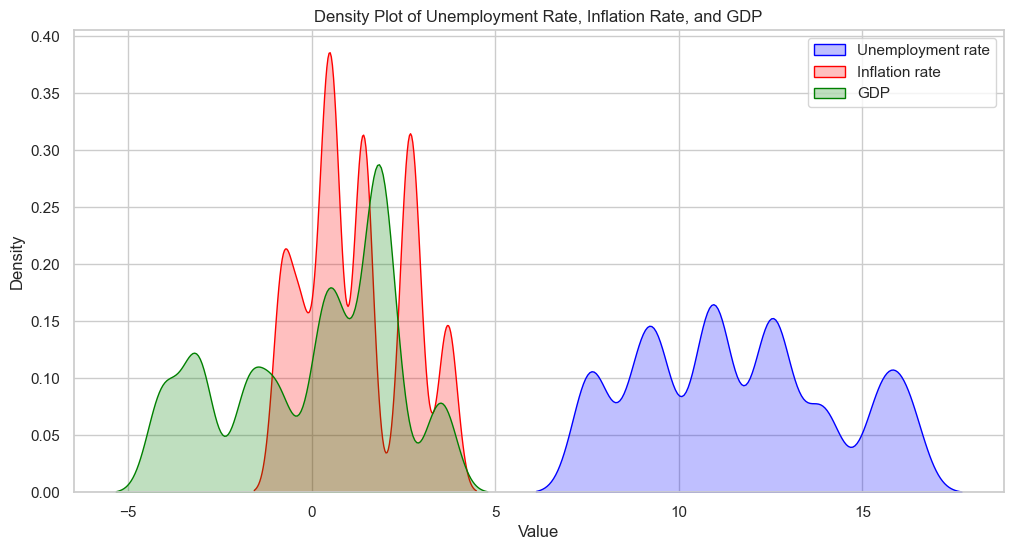

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que ya tienes el DataFrame 'df' definido
# Crear el gráfico de densidad para las tres columnas

# Configura el estilo del gráfico
sns.set(style="whitegrid")

# Crear el gráfico de densidad
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='Unemployment rate', fill=True, label='Unemployment rate', color='blue')
sns.kdeplot(data=df, x='Inflation rate', fill=True, label='Inflation rate', color='red')
sns.kdeplot(data=df, x='GDP', fill=True, label='GDP', color='green')

# Añadir títulos y leyendas
plt.title('Density Plot of Unemployment Rate, Inflation Rate, and GDP')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

# Mostrar el gráfico
plt.show()
